In [ ]:
# swap 2,7
a = 2
b = 7

a, b = b, a

print(f"{a}, {b}")

In [5]:
from scipy.stats import uniform


a = 0
b = 20

width = b-a
x1, x2 = 5, 10

prob_manual = (x2 - x1) / (b - a)

prob_scipy = uniform.cdf(x2, loc = a, scale = width) - uniform.cdf(x1, loc=a, scale=width)

print(f"Manual Probability: {prob_manual:.2%}")
print(f"Scipy Probability: {prob_scipy:.2%}")

Manual Probability: 25.00%
Scipy Probability: 25.00%


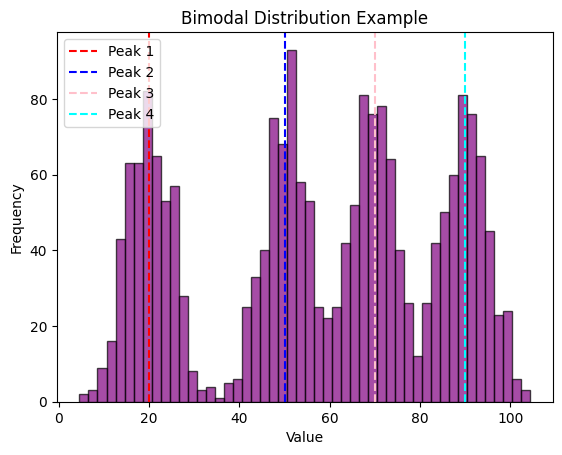

In [15]:

import numpy as np
import matplotlib.pyplot as plt

group_a = np.random.normal(loc = 20, scale= 5, size = 500)

group_b = np.random.normal(loc=50, scale= 5, size= 500)

group_c = np.random.normal(loc=70, scale= 5, size= 500)

group_d = np.random.normal(loc=90, scale= 5, size= 500)

data = np.concatenate([group_a, group_b, group_c, group_d])

plt.hist(data, bins=50,color='purple', edgecolor='black', alpha=0.7)

plt.title('Bimodal Distribution Example')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.axvline(20, color= 'red', linestyle = '--', label='Peak 1')
plt.axvline(50, color= 'blue', linestyle = '--', label='Peak 2')
plt.axvline(70, color= 'pink', linestyle = '--', label='Peak 3')
plt.axvline(90, color= 'cyan', linestyle = '--', label='Peak 4')
plt.legend()




# Kernel Density Estimate (KDE)

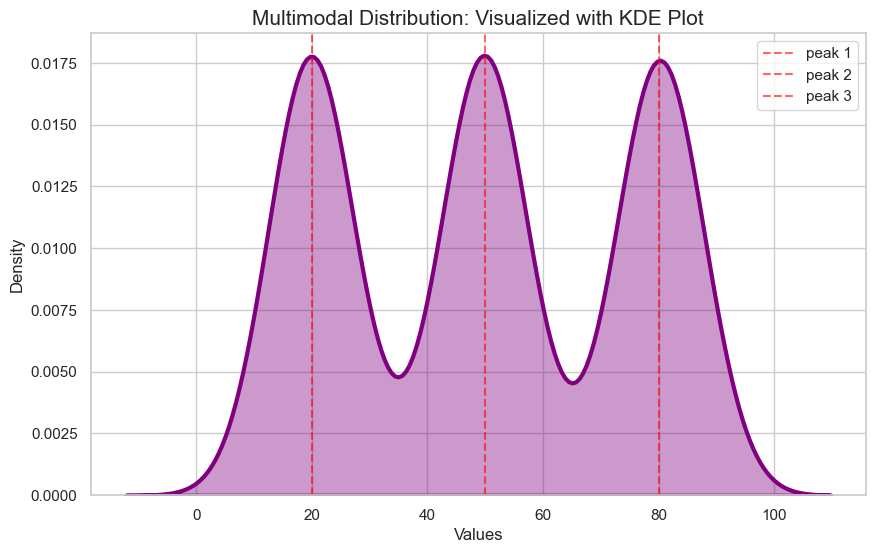

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

peak1 = np.random.normal(loc=20, scale=4, size=300)
peak2 = np.random.normal(loc=50, scale=4, size=300)
peak3 = np.random.normal(loc=80, scale=4, size=300)

multimodal_data = np.concatenate([peak1, peak2, peak3])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(multimodal_data, fill = True, color="purple", linewidth=3, alpha = 0.4)

plt.title('Multimodal Distribution: Visualized with KDE Plot', fontsize= 15)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

plt.axvline(20, color = 'red', linestyle = '--', alpha=0.6, label='peak 1')
plt.axvline(50, color = 'red', linestyle = '--', alpha=0.6, label='peak 2')
plt.axvline(80, color = 'red', linestyle = '--', alpha=0.6, label='peak 3')
plt.legend()



plt.show()


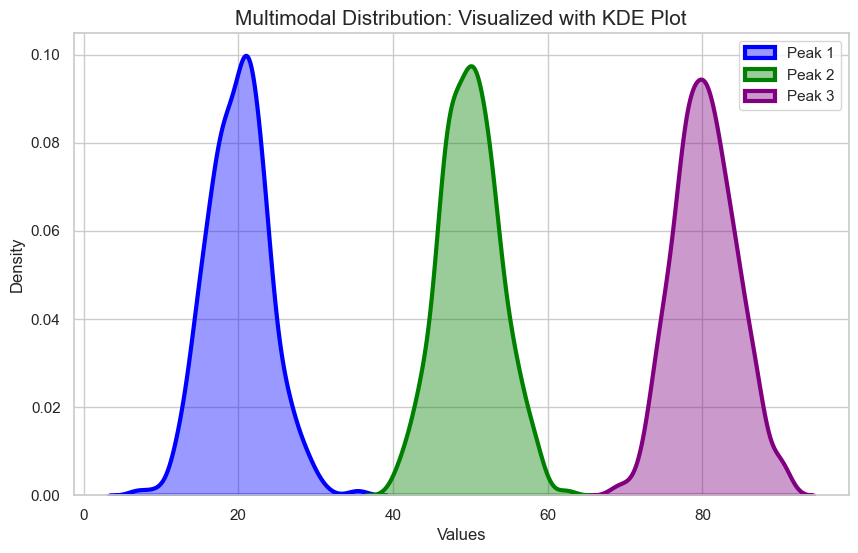

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

peak1 = np.random.normal(loc=20, scale=4, size=300)
peak2 = np.random.normal(loc=50, scale=4, size=300)
peak3 = np.random.normal(loc=80, scale=4, size=300)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot each KDE separately with unique colors
sns.kdeplot(peak1, fill=True, color="blue", linewidth=3, alpha=0.4, label="Peak 1")
sns.kdeplot(peak2, fill=True, color="green", linewidth=3, alpha=0.4, label="Peak 2")
sns.kdeplot(peak3, fill=True, color="purple", linewidth=3, alpha=0.4, label="Peak 3")

plt.title('Multimodal Distribution: Visualized with KDE Plot', fontsize=15)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend()
plt.show()


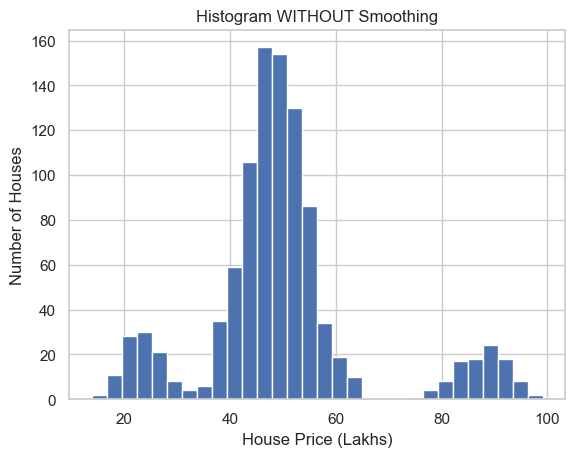

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Generate simple real-world data:
# House prices (in lakhs) collected from a city
np.random.seed(10)
prices = np.concatenate([
np.random.normal(50, 6, 800), # normal houses
np.random.normal(90, 5, 100), # luxury houses
np.random.normal(25, 4, 100) # cheaper houses
])
# Create histogram (no smoothing)
counts, bins = np.histogram(prices, bins=30)
plt.figure()
plt.bar(bins[:-1], counts, width=np.diff(bins))
plt.title("Histogram WITHOUT Smoothing")
plt.xlabel("House Price (Lakhs)")
plt.ylabel("Number of Houses")
plt.show()
# Student observation:
# - Bars look uneve

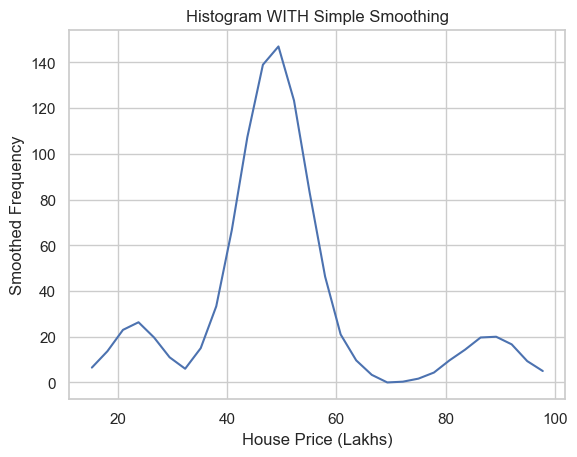

In [4]:

import numpy as np
import matplotlib.pyplot as plt
# Same data used again for fair comparison
np.random.seed(10)
prices = np.concatenate([
np.random.normal(50, 6, 800),
np.random.normal(90, 5, 100),
np.random.normal(25, 4, 100)
])


# Create histogram
counts, bins = np.histogram(prices, bins=30)
# SIMPLE smoothing using average of neighbors
smoothed = []
for i in range(len(counts)):
    if i == 0:
        smoothed.append((counts[i] + counts[i+1]) / 2)
    elif i == len(counts) - 1:
        smoothed.append((counts[i] + counts[i-1]) / 2)
    else:
        smoothed.append((counts[i-1] + counts[i] + counts[i+1]) / 3)
# Plot smoothed line
plt.figure()
plt.plot(bins[:-1], smoothed)
plt.title("Histogram WITH Simple Smoothing")
plt.xlabel("House Price (Lakhs)")
plt.ylabel("Smoothed Frequency")
plt.show()
